## Chapter 5: Cross-Validation and Bootstrap

In [144]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import LeaveOneOut
from sklearn.cross_validation import KFold
#from sklearn.cross_validation import Bootstrap
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### The Validation Set Approach

In [35]:
auto_df = pd.read_csv("./data/Auto.csv", na_values="?")
auto_df.dropna(inplace=True)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


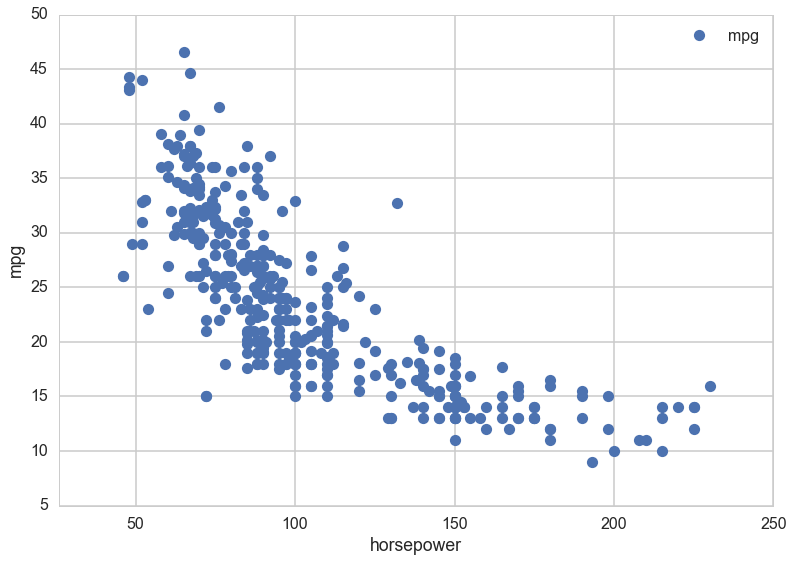

In [36]:
ax = auto_df.plot(x="horsepower", y="mpg", style="o")
ax.set_ylabel("mpg")
ax.set_xlim([min(auto_df["horsepower"].values)-20, max(auto_df["horsepower"].values)+20]);

### Leave one out cross validation (LOOCV)

In [37]:
lm = LinearRegression()
loo = LeaveOneOut(len(auto_df))
X = auto_df["horsepower"].values
y = auto_df["mpg"].values
n = np.shape(X)[0]

mses = []
for train, test in loo: # train and test contain indices
    Xtrain, ytrain, Xtest, ytest = X[train], y[train], X[test], y[test]    
    lm.fit(Xtrain[:,np.newaxis], ytrain) # Convert Xtrain to nx1 array to avoid Out of Index error
    ypred = lm.predict(Xtest[:,np.newaxis])
    mses.append(mean_squared_error(ytest,ypred))
    
np.mean(mses)

24.23151351792923

In [52]:
def loo_cv(X, y):
    lm = LinearRegression()
    loo = LeaveOneOut(len(auto_df))
    n = np.shape(X)[0]

    mses = []
    for train, test in loo: # train and test contain indices
        Xtrain, ytrain, Xtest, ytest = X[train], y[train], X[test], y[test]    
        #lm.fit(Xtrain[:,np.newaxis], ytrain) # Convert Xtrain to nx1 array to avoid Out of Index error
        #ypred = lm.predict(Xtest[:,np.newaxis])
        lm.fit(Xtrain, ytrain) # Convert Xtrain to nx1 array to avoid Out of Index error
        ypred = lm.predict(Xtest)
        mses.append(mean_squared_error(ytest,ypred))
    return np.mean(mses)
        
loo_cv(auto_df["horsepower"].values[:,np.newaxis], auto_df["mpg"].values)

24.23151351792923

[24.23151351792923, 19.248213124489677, 19.334984064029175, 19.424430310525526, 19.033212083740331]


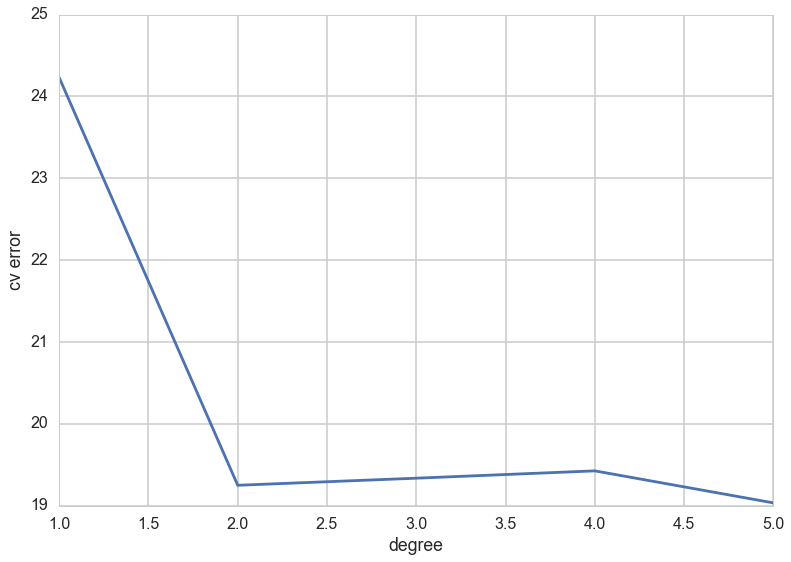

In [90]:
# Determine degree of polynomial using LOOCV
auto_df = pd.read_csv("./data/Auto.csv", na_values="?")
auto_df.dropna(inplace=True)
auto_df.head()

# Add columns into auto_df
degrees = np.arange(1,6)
for degree in degrees[1:]:
    if (degree==2):
        auto_df["horsepower^"+str(degree)] = auto_df["horsepower"]*auto_df["horsepower"]
    else:
        auto_df["horsepower^"+str(degree)] = auto_df["horsepower^"+str(degree-1)]*auto_df["horsepower"]

# Calculate errors
cv_errors = []
for degree in degrees:    
    hp_cols = [col for col in auto_df.columns if "horsepower" in col]
    cv_error = loo_cv(auto_df[hp_cols[0:degree]].values, auto_df["mpg"].values)
    cv_errors.append(cv_error)
        
print (cv_errors)

plt.plot(degrees, cv_errors)
plt.xlabel("degree")
plt.ylabel("cv error")

   ### K-fold cross validation

In [91]:
def kfold_cv(X, y):
    lm = LinearRegression()
    kfold = KFold(len(auto_df), n_folds=10)
    n = np.shape(X)[0]

    mses = []
    for train, test in kfold: # train and test contain indices
        Xtrain, ytrain, Xtest, ytest = X[train], y[train], X[test], y[test]    
        #lm.fit(Xtrain[:,np.newaxis], ytrain) # Convert Xtrain to nx1 array to avoid Out of Index error
        #ypred = lm.predict(Xtest[:,np.newaxis])
        lm.fit(Xtrain, ytrain) # Convert Xtrain to nx1 array to avoid Out of Index error
        ypred = lm.predict(Xtest)
        mses.append(mean_squared_error(ytest,ypred))
    return np.mean(mses)
        
kfold_cv(auto_df["horsepower"].values[:,np.newaxis], auto_df["mpg"].values)


27.439933652339867

[27.439933652339867, 21.235840055802232, 21.336606183227314, 21.353886981375947, 20.905640413860606]


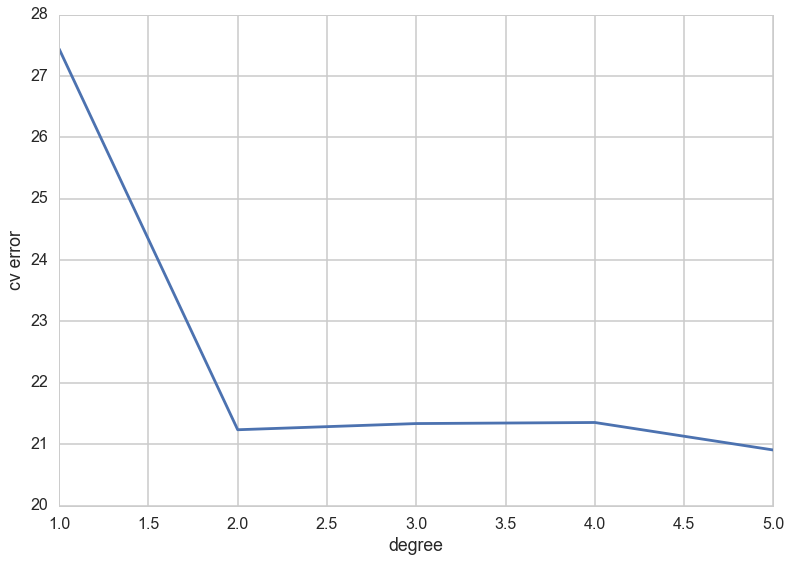

In [92]:
# Calculate errors
cv_errors = []
for degree in degrees:    
    hp_cols = [col for col in auto_df.columns if "horsepower" in col]
    cv_error = kfold_cv(auto_df[hp_cols[0:degree]].values, auto_df["mpg"].values)
    cv_errors.append(cv_error)
        
print (cv_errors)

plt.plot(degrees, cv_errors)
plt.xlabel("degree")
plt.ylabel("cv error")

### ShuffleSplit (Random permutations cross-validation ) 
Bootstrap was removed from sklearn 0.17.1

In [105]:
def shuffle_split_cv(X, y):
    lm = LinearRegression()    
    n = np.shape(X)[0]
    ss = cross_validation.ShuffleSplit(n, n_iter=10, test_size=0.1,random_state=0)

    mses = []
    for train, test in ss: # train and test contain indices
        Xtrain, ytrain, Xtest, ytest = X[train], y[train], X[test], y[test]    
        #lm.fit(Xtrain[:,np.newaxis], ytrain) # Convert Xtrain to nx1 array to avoid Out of Index error
        #ypred = lm.predict(Xtest[:,np.newaxis])
        lm.fit(Xtrain, ytrain) # Convert Xtrain to nx1 array to avoid Out of Index error
        ypred = lm.predict(Xtest)
        mses.append(mean_squared_error(ytest,ypred))
    return np.mean(mses)
        
shuffle_split_cv(auto_df["horsepower"].values[:,np.newaxis], auto_df["mpg"].values)

21.972802774399476

[21.972802774399476, 16.514474815985874, 16.524732691653149, 16.580769705387016, 16.231410581604354]


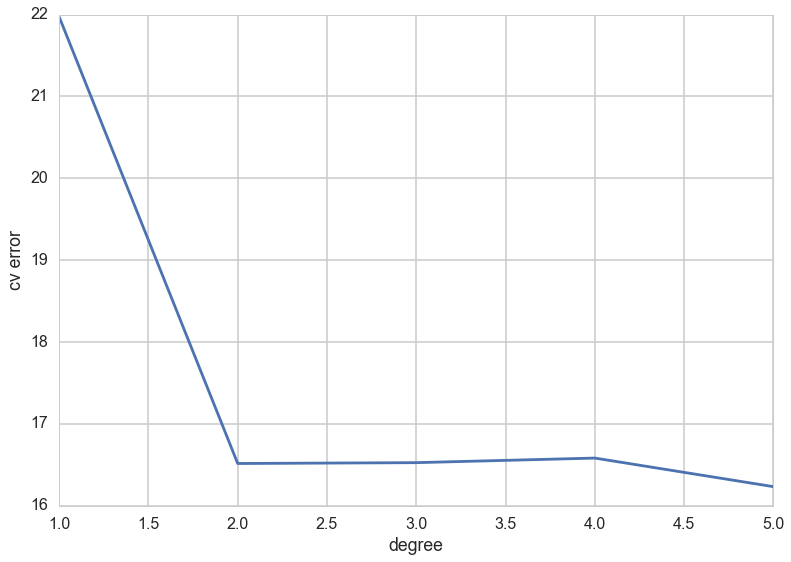

In [106]:
# Calculate errors
cv_errors = []
for degree in degrees:    
    hp_cols = [col for col in auto_df.columns if "horsepower" in col]
    cv_error = shuffle_split_cv(auto_df[hp_cols[0:degree]].values, auto_df["mpg"].values)
    cv_errors.append(cv_error)
        
print (cv_errors)

plt.plot(degrees, cv_errors)
plt.xlabel("degree")
plt.ylabel("cv error")

In [120]:
def alpha(x, y):
    # calculate optimal alpha for portfolio alpha*X + (1-alpha)*Y
    vx = np.var(x)
    vy = np.var(y)
    cxy = np.cov(x, y)[0,1] # np.cov returns covariance matrix. Select off-diagonal term
    return (vy - cxy)/(vx + vy - 2*cxy)
    
pf_df = pd.read_csv("./data/Portfolio.csv")
pf_df.head()

,X,Y
0,-0.895251,-0.234924
1,-1.562454,-0.885176
2,-0.417090,0.271888
3,1.044356,-0.734198
4,-0.315568,0.841983


In [121]:
alpha(pf_df["X"].values, pf_df["Y"].values)

0.57665115161041158

0.576309425264 8.60539607002e-05


(array([  36.,   36.,   20.,  210.,  452.,  139.,   68.,   15.,   15.,    9.]),
 array([ 0.54914741,  0.5552986 ,  0.56144979,  0.56760098,  0.57375217,
         0.57990336,  0.58605455,  0.59220574,  0.59835693,  0.60450812,
         0.61065931]),
 <a list of 10 Patch objects>)

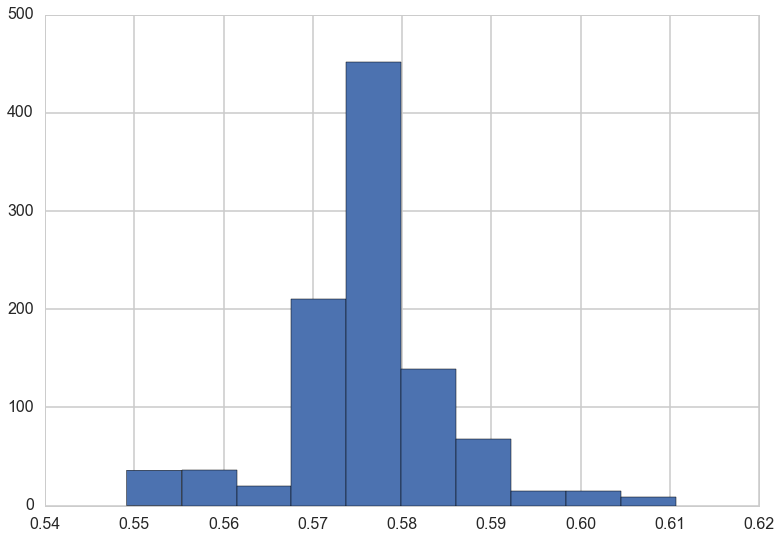

In [143]:
# Distribution of alpha using SplitShuffle (random permulations)
# SplitShuffle doesn't apprear to be a good method for this problem
X = pf_df["X"].values
Y = pf_df["Y"].values
n = len(X)
ss = cross_validation.ShuffleSplit(n, n_iter=1000, test_size=.01,random_state=0)
        # n_train = (1 - test_size)*n
alphas = []
for train, test in ss:
    xtrain, ytrain = X[train], Y[train]    
    alphas.append(alpha(xtrain, ytrain))
    
print (np.mean(alphas), np.var(alphas))
plt.hist(alphas)

mean: 0.578779553603
standard error: 0.0906984656149


(array([   3.,   24.,   77.,  145.,  206.,  229.,  167.,   99.,   42.,    8.]),
 array([ 0.29688296,  0.35135277,  0.40582258,  0.4602924 ,  0.51476221,
         0.56923202,  0.62370183,  0.67817165,  0.73264146,  0.78711127,
         0.84158108]),
 <a list of 10 Patch objects>)

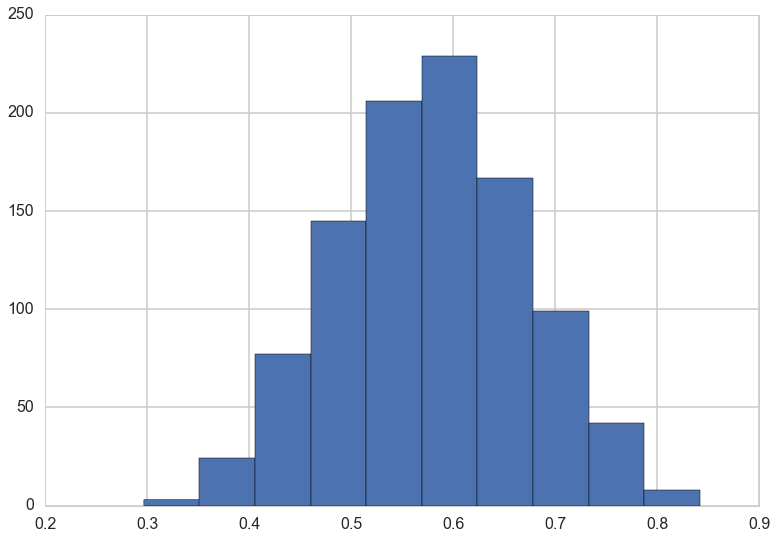

In [169]:
# Distribution of alpha using Bootstrap using sklearn.utils.resample
alphas = []
for _ in np.arange(0,1000):
    Xrs, Yrs = resample(X, Y)
    alphas.append(alpha(Xrs, Yrs))
    
print ("mean:", np.mean(alphas))
print ("standard error:", np.sqrt(np.var(alphas)))
plt.hist(alphas)

### Estimating accuracy of a linear regression model

In [192]:
lm = LinearRegression()
X = auto_df["horsepower"].values
y = auto_df["mpg"].values

intercepts = []
coefs = []
for _ in np.arange(0,1000):
    Xrs, yrs = resample(X, y)
    lm.fit(Xrs[:,np.newaxis], yrs)
    intercepts.append(lm.intercept_)
    coefs.append(lm.coef_)
    
print ("intercept")
print ("mean:", np.mean(intercepts))
print ("standard error:", np.sqrt(np.var(intercepts)))
print ("coefficient")
print ("mean:", np.mean(coefs))
print ("standard error:", np.sqrt(np.var(coefs)))


intercept
mean: 40.0100186623
standard error: 0.830401240247
coefficient
mean: -0.158574406301
standard error: 0.00723660327214


In [201]:
lm = LinearRegression()
X = auto_df[["horsepower", "horsepower^2"]].values
y = auto_df["mpg"].values

intercepts = []
coefs = []
for _ in np.arange(0,10):
    Xrs, yrs = resample(X, y)
    lm.fit(Xrs, yrs)
    intercepts.append(lm.intercept_)
    coefs.append(lm.coef_)
    
print ("intercept")
print ("mean:", np.mean(intercepts))
print ("standard error:", np.sqrt(np.var(intercepts)))
print ("coefficient")
print ("mean:", np.mean(coefs, axis=0))
print ("standard error:", np.sqrt(np.var(coefs, axis=0)))

intercept
mean: 56.7524572351
standard error: 1.67619589298
coefficient
mean: [-0.46186464  0.00120722]
standard error: [  2.69757604e-02   9.85600988e-05]


In [200]:
np.mean(coefs, axis=0)

array([-0.46564917,  0.00122385])